## Project 2: Beta Calculator

For my second project, I decided to try and make a simple function to calculate a stock's beta, which measures a stock's volatility relative to the market. If a stock has a beta of 1, its price is strongly correlated with the market. If it is higher than 1, it is more volatile than the market. If it is lower than 1, it is less volatile than the market.

There are different ways to calculate beta, but for my function I calculated beta by dividing the covariance of the stock's returns with market returns by the variance of the market:

$\beta = Cov(stock,market)/Var(market)$

Beta is usually calculated over a 5-year period with monthly returns but my function can use different time periods for the overall period as well the length of interval or returns. The benchmark I use for the market is the SPDR S&P 500 (SPY), an ETF that tracks the S&P 500 stock market index.



In [1]:
#Import the necessary libraries. Yfinance is where you get historical stock prices.
import pandas as pd
import numpy as np
import yfinance as yf

#Here I define the function beta_Calc. 
#s1 stands for stock1. Time is the overall time period of the beta calculation. Interval is the interval for returns. 
def beta_Calc(s1,time, interval):
   
    #The first step is to pull the historical closing price data of the chosen stock and of the SPY. All null values are dropped.
    stock1 = yf.Ticker(s1)
    stock1_hist = stock1.history(period=time, interval=interval)
    stock_choice = stock1_hist['Close']
    stock_choice = stock_choice.dropna()
   
    spy = yf.Ticker("SPY")
    spy_hist = spy.history(period=time, interval=interval)
    benchmark = spy_hist['Close']
    benchmark = benchmark.dropna()
    
    #These sections calculate the percentage change of returns and drops null values.
    stock1_PercentageReturn = pd.DataFrame(stock_choice)
    x = stock1_PercentageReturn.pct_change()
    x = x.dropna()
   
    benchmark_PercentageReturn = pd.DataFrame(benchmark)
    y = benchmark_PercentageReturn.pct_change()
    y = y.dropna()
    
    #This section combines the two columns of data into one data frame.
    combo = np.column_stack((x,y))
    combo_df = pd.DataFrame(combo) 
    
    #Now that the two columns are combined, we can take the covariance of the stock to the market.
    #We also calculate the variance of the market.
    covariance = combo_df.cov()
    final_covariance = covariance.iloc[0,1]
    variance = np.var(y) 
    
    #Finally we divide the covariance by the variance to get beta.
    Beta = final_covariance/variance
    print("Your Beta is: %f" %Beta)


In [12]:
#We call the function by typing the desired stock symbol, followed by the desired time period, followed by the desired interval of returns.
beta_Calc("KO", "5y", "1mo")

Your Beta is: 0.546585


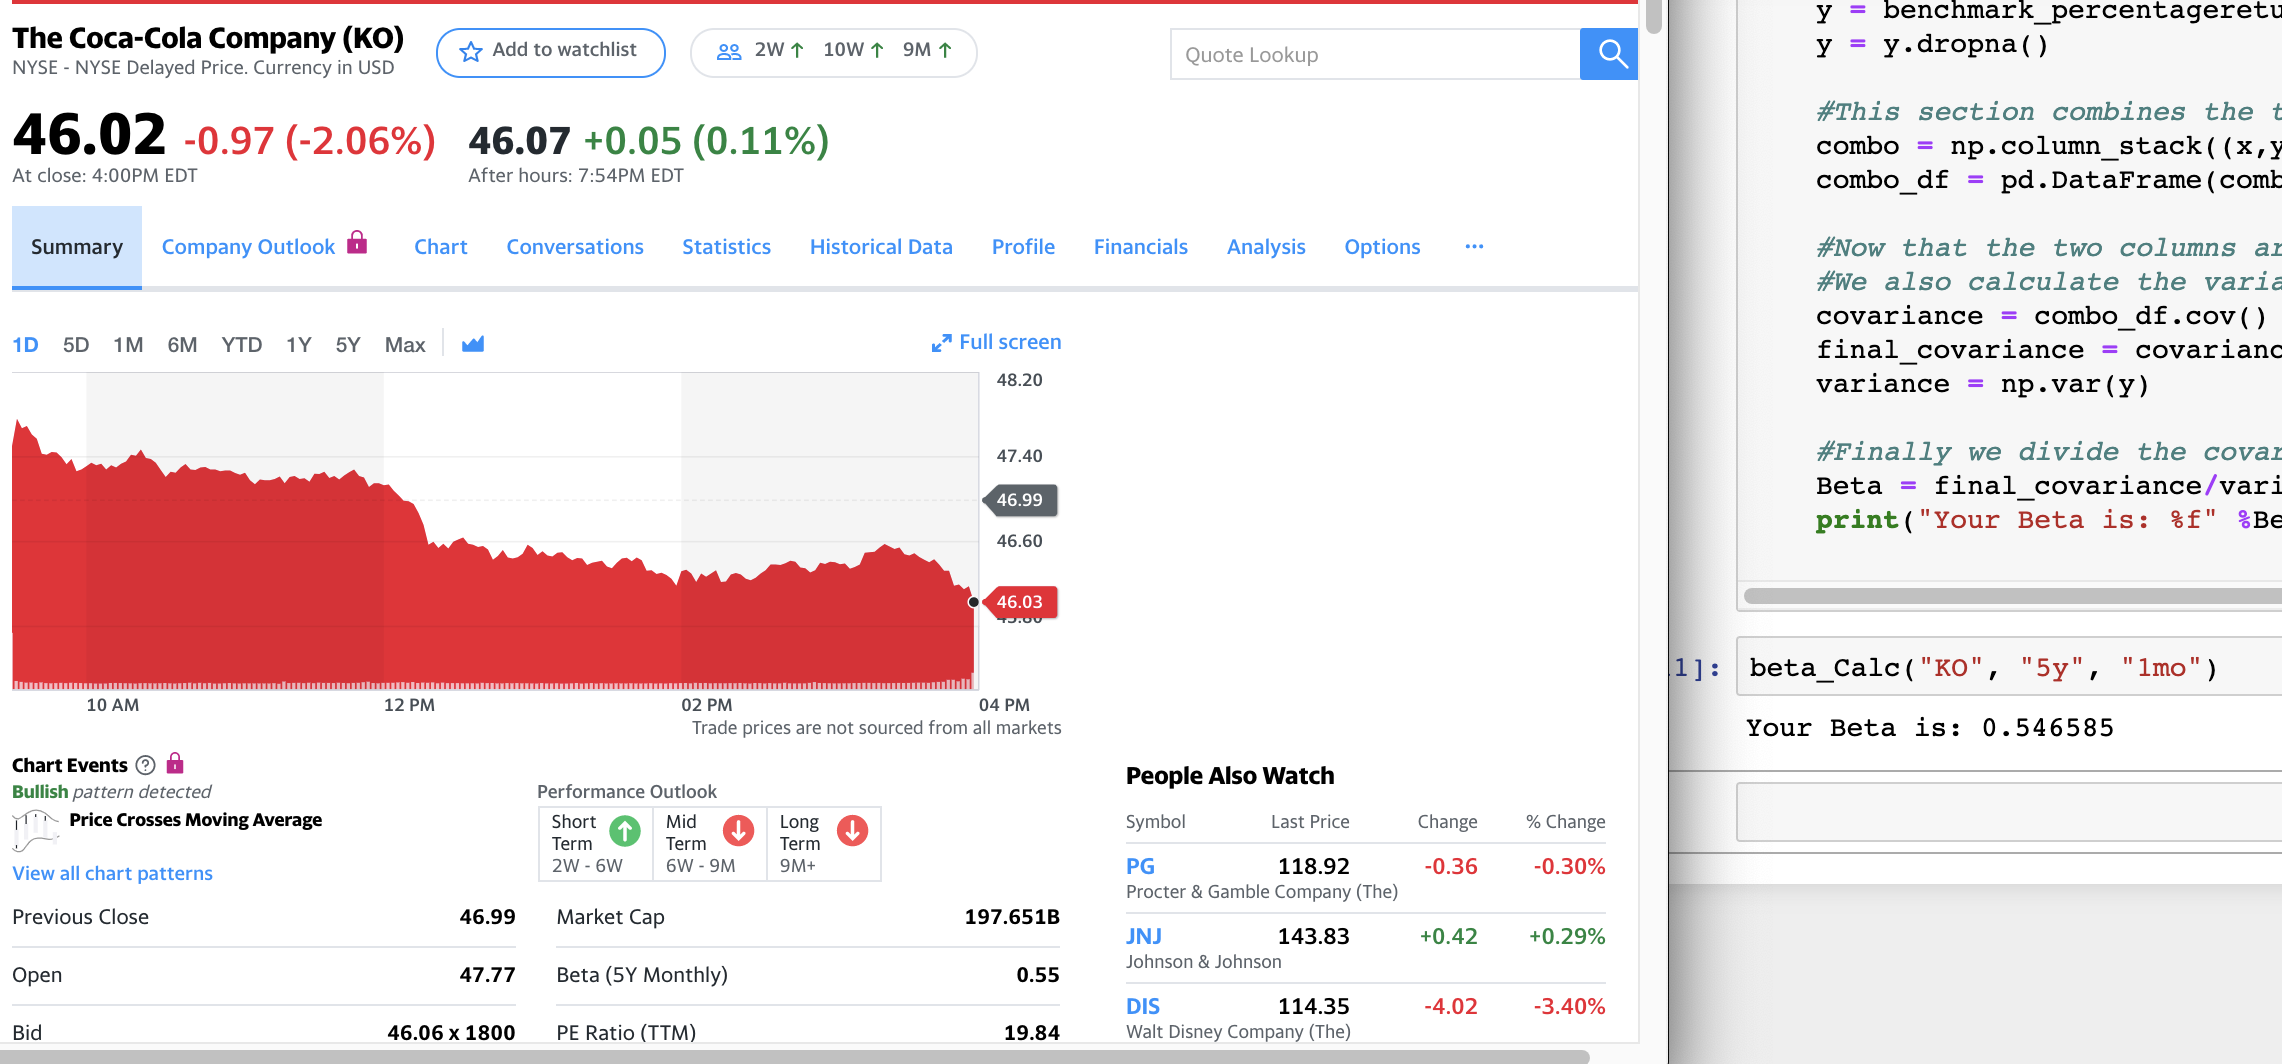

As a test, we can compare my function to Yahoo Finance's 5Y Monthly Beta. 